# 数据探视

# 1.数据的基本信息

    本次问题包含三个数据文件，store.csv、train.csv、test.csv。

    store.csv，共有1115条数据，包含以下字段：
        store——店铺编号
        storetype——店铺类型，四种类型a, b, c, d
        assortment——货品品类，三种类型a = basic, b = extra, c = extended
        competitiondistance——最近的竞争店铺距离
        CompetitionOpenSinceMonth——最近的竞争店铺开业月份（估计值）
        CompetitionOpenSinceYear——最近的竞争店铺开业年份（估计值）
        Promo2——店铺是否参加连续促销，1是，0否
        Promo2SinceWeek——连续促销在第几周开始
        Promo2SinceYear——连续促销在哪一年开始
        PromoInterval——每年的连续促销在哪些月份开始

    train.csv，共有1017209条数据，包含以下字段：
        Store——店铺编号
        DayOfWeek——统计日期是周几
        Date——统计日期
        Sales——当日销售额
        Customers——当日客户数
        Open——当日是否开业，1是，0否
        Promo——当日是否促销，1是，0否
        StateHoliday——当日是否法定假期，0 =非假期 a = 公共假期 b = 复活节假期 c = 圣诞假期
        SchoolHoliday——当日是否公立学校假期，1是，0否

    test.csv,共有41088条数据，包括以下字段：
        Id——数据编号
        Store——店铺编号
        DayOfWeek——待预测日期是周几
        Date——待预测日期
        Open——当日是否开业
        Promo——当日是否促销
        StateHoliday——当日是否法定假期
        SchoolHoliday——当日是否公立学校假期

# 2.数据探视

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [3]:
train_org = pd.read_csv('data/train.csv')

/root/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
test_org = pd.read_csv('data/test.csv')

In [5]:
store_org = pd.read_csv('data/store.csv')

In [23]:
store_org.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [5]:
store_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
store_org['CompetitionDistance'].describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

In [7]:
store_org.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [99]:
store_org['PromoInterval'].value_counts().keys()

Index(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'], dtype='object')

In [100]:
store_org['PromoInterval'].value_counts().get_values()

array([335, 130, 106])

In [101]:
store_org['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

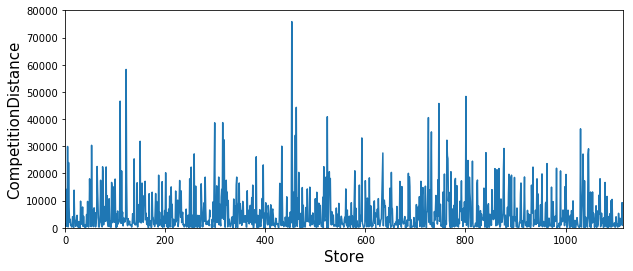

In [66]:
plt.figure(figsize=(10,4))
plt.plot(store_org['Store'],store_org['CompetitionDistance'])
plt.ylim(0,80000)
plt.xlim(0,1115)
plt.xlabel('Store',fontsize=15)
plt.ylabel('CompetitionDistance',fontsize=15)

/root/anaconda3/envs/capstone/lib/python3.6/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/root/anaconda3/envs/capstone/lib/python3.6/site-packages/matplotlib/cbook.py:2066: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/root/anaconda3/envs/capstone/lib/python3.6/site-packages/matplotlib/cbook.py:2073: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/root/anaconda3/envs/capstone/lib/python3.6/site-packages/matplotlib/cbook.py:2081: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/root/anaconda3/envs/capstone/lib/python3.6/site-packages/matplotlib/cbook.py:2082: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


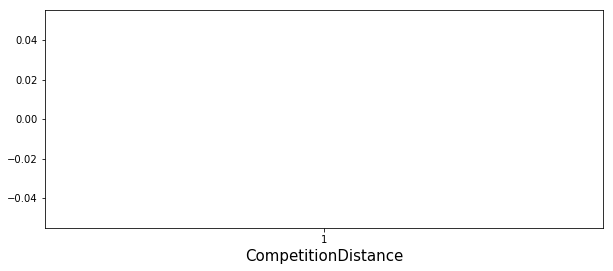

In [34]:
plt.figure(figsize=(10,4))
plt.boxplot(store_org['CompetitionDistance'])
#plt.ylim(0,80000)
#plt.xlim(0,1115)
plt.xlabel('CompetitionDistance',fontsize=15)
#plt.ylabel('CompetitionDistance',fontsize=15)

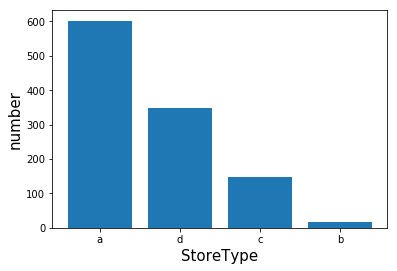

In [29]:
plt.bar(range(4),store_org['StoreType'].value_counts().get_values(),tick_label=store_org['StoreType'].value_counts().keys())
plt.xlabel('StoreType',fontsize=15)
plt.ylabel('number',fontsize=15)

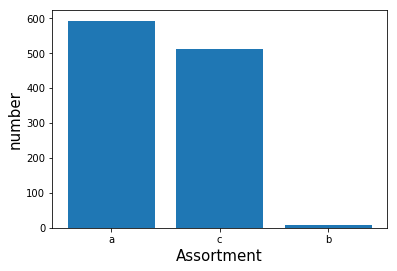

In [30]:
plt.bar(range(3),store_org['Assortment'].value_counts().get_values(),tick_label=store_org['Assortment'].value_counts().keys())
plt.xlabel('Assortment',fontsize=15)
plt.ylabel('number',fontsize=15)

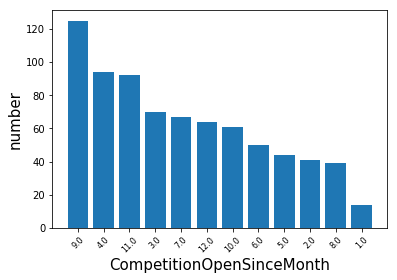

In [31]:
plt.bar(range(12),store_org['CompetitionOpenSinceMonth'].value_counts().get_values(),tick_label=store_org['CompetitionOpenSinceMonth'].value_counts().keys())
plt.xlabel('CompetitionOpenSinceMonth',fontsize=15)
pl.xticks(rotation=45,fontsize='8')
plt.ylabel('number',fontsize=15)

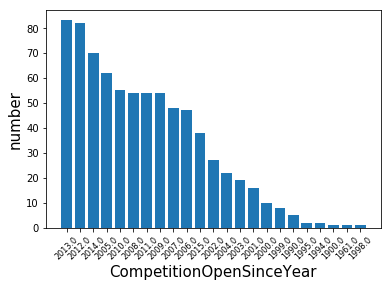

In [32]:
plt.bar(range(23),store_org['CompetitionOpenSinceYear'].value_counts().get_values(),tick_label=store_org['CompetitionOpenSinceYear'].value_counts().keys())
plt.xlabel('CompetitionOpenSinceYear',fontsize=15)
pl.xticks(rotation=45,fontsize='8')
plt.ylabel('number',fontsize=15)

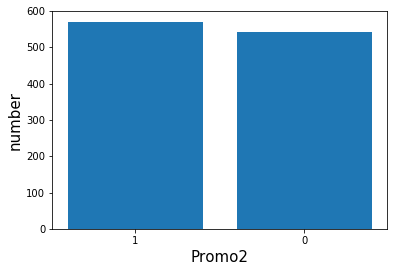

In [47]:
plt.bar(range(2),store_org['Promo2'].value_counts().get_values(),tick_label=store_org['Promo2'].value_counts().keys())
plt.xlabel('Promo2',fontsize=15)
plt.ylabel('number',fontsize=15)

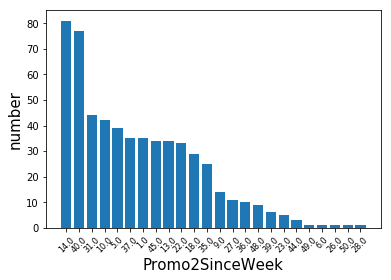

In [48]:
plt.bar(range(24),store_org['Promo2SinceWeek'].value_counts().get_values(),tick_label=store_org['Promo2SinceWeek'].value_counts().keys())
plt.xlabel('Promo2SinceWeek',fontsize=15)
pl.xticks(rotation=45,fontsize='8')
plt.ylabel('number',fontsize=15)

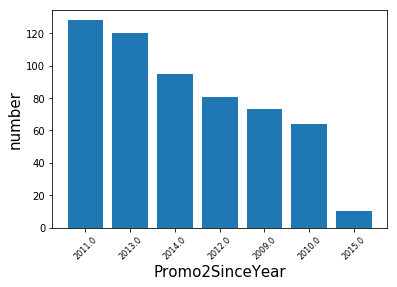

In [49]:
plt.bar(range(7),store_org['Promo2SinceYear'].value_counts().get_values(),tick_label=store_org['Promo2SinceYear'].value_counts().keys())
plt.xlabel('Promo2SinceYear',fontsize=15)
pl.xticks(rotation=45,fontsize='8')
plt.ylabel('number',fontsize=15)

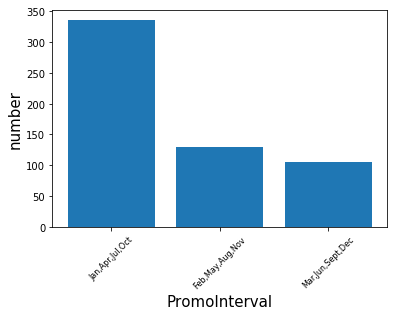

In [50]:
plt.bar(range(3),store_org['PromoInterval'].value_counts().get_values(),tick_label=store_org['PromoInterval'].value_counts().keys())
plt.xlabel('PromoInterval',fontsize=15)
pl.xticks(rotation=45,fontsize='8')
plt.ylabel('number',fontsize=15)

In [5]:
plt.figure(figsize=(200,160),dpi=100)

In [10]:
#fig = plt.figure(figsize=(400,320),dpi=80)
#font1 = {'family':'Times New Roman','weight':'normal','size': 23}

plt.subplot(3,3,1)
plt.bar(range(4),store_org['StoreType'].value_counts().get_values(),tick_label=store_org['StoreType'].value_counts().keys())
plt.xlabel('StoreType')
plt.ylabel('number')

plt.subplot(3,3,2)
plt.bar(range(3),store_org['Assortment'].value_counts().get_values(),tick_label=store_org['Assortment'].value_counts().keys())
plt.xlabel('Assortment')
plt.ylabel('number')

plt.subplot(3,3,3)
plt.bar(range(12),store_org['CompetitionOpenSinceMonth'].value_counts().get_values(),tick_label=store_org['CompetitionOpenSinceMonth'].value_counts().keys())
plt.xlabel('CompetitionOpenSinceMonth')
pl.xticks(rotation=45,fontsize='8')
plt.ylabel('number')


plt.subplot(3,3,4)
plt.bar(range(23),store_org['CompetitionOpenSinceYear'].value_counts().get_values(),tick_label=store_org['CompetitionOpenSinceYear'].value_counts().keys())
plt.xlabel('CompetitionOpenSinceYear')
pl.xticks(rotation=45,fontsize='8')
plt.ylabel('number')

plt.subplot(3,3,5)
plt.bar(range(2),store_org['Promo2'].value_counts().get_values(),tick_label=store_org['Promo2'].value_counts().keys())
plt.xlabel('Promo2')
plt.ylabel('number')

plt.subplot(3,3,6)
plt.bar(range(24),store_org['Promo2SinceWeek'].value_counts().get_values(),tick_label=store_org['Promo2SinceWeek'].value_counts().keys())
plt.xlabel('Promo2SinceWeek')
pl.xticks(rotation=45,fontsize='8')
plt.ylabel('number')

plt.subplot(3,3,7)
plt.bar(range(7),store_org['Promo2SinceYear'].value_counts().get_values(),tick_label=store_org['Promo2SinceYear'].value_counts().keys())
plt.xlabel('Promo2SinceYear')
pl.xticks(rotation=45,fontsize='8')
plt.ylabel('number')

plt.subplot(3,3,8)
plt.bar(range(3),store_org['PromoInterval'].value_counts().get_values(),tick_label=store_org['PromoInterval'].value_counts().keys())
plt.xlabel('PromoInterval')
pl.xticks(rotation=45,fontsize='8')
plt.ylabel('number')

plt.tight_layout(pad=0.2, w_pad=0.3, h_pad=1.0)

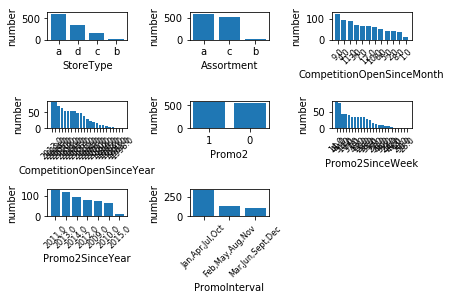

In [11]:
plt.show()

In [70]:
train_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [87]:
train_org.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [78]:
train_org['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

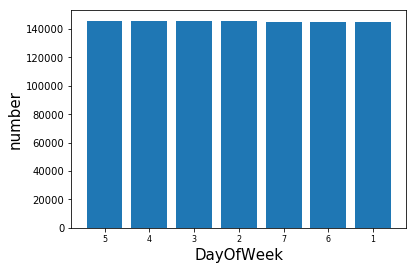

In [81]:
plt.bar(range(7),train_org['DayOfWeek'].value_counts().get_values(),tick_label=train_org['DayOfWeek'].value_counts().keys())
plt.xlabel('DayOfWeek',fontsize=15)
pl.xticks(fontsize='8')
plt.ylabel('number',fontsize=15)

In [83]:
train_org['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

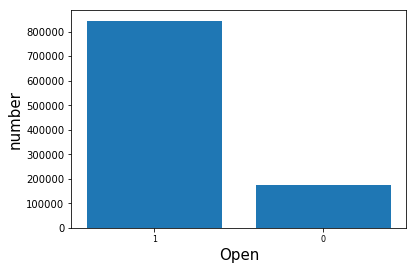

In [84]:
plt.bar(range(2),train_org['Open'].value_counts().get_values(),tick_label=train_org['Open'].value_counts().keys())
plt.xlabel('Open',fontsize=15)
pl.xticks(fontsize='8')
plt.ylabel('number',fontsize=15)

In [85]:
train_org['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

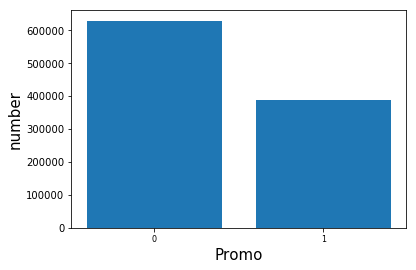

In [86]:
plt.bar(range(2),train_org['Promo'].value_counts().get_values(),tick_label=train_org['Promo'].value_counts().keys())
plt.xlabel('Promo',fontsize=15)
pl.xticks(fontsize='8')
plt.ylabel('number',fontsize=15)

In [88]:
train_org['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

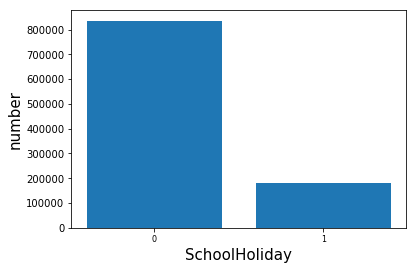

In [89]:
plt.bar(range(2),train_org['SchoolHoliday'].value_counts().get_values(),tick_label=train_org['SchoolHoliday'].value_counts().keys())
plt.xlabel('SchoolHoliday',fontsize=15)
pl.xticks(fontsize='8')
plt.ylabel('number',fontsize=15)

In [92]:
train_org['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

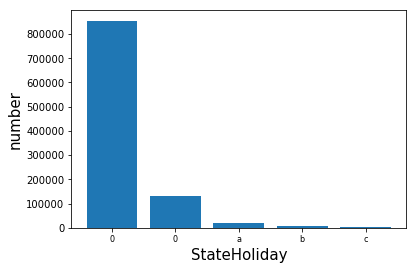

In [94]:
plt.bar(range(5),train_org['StateHoliday'].value_counts().get_values(),tick_label=train_org['StateHoliday'].value_counts().keys())
plt.xlabel('StateHoliday',fontsize=15)
pl.xticks(fontsize='8')
plt.ylabel('number',fontsize=15)

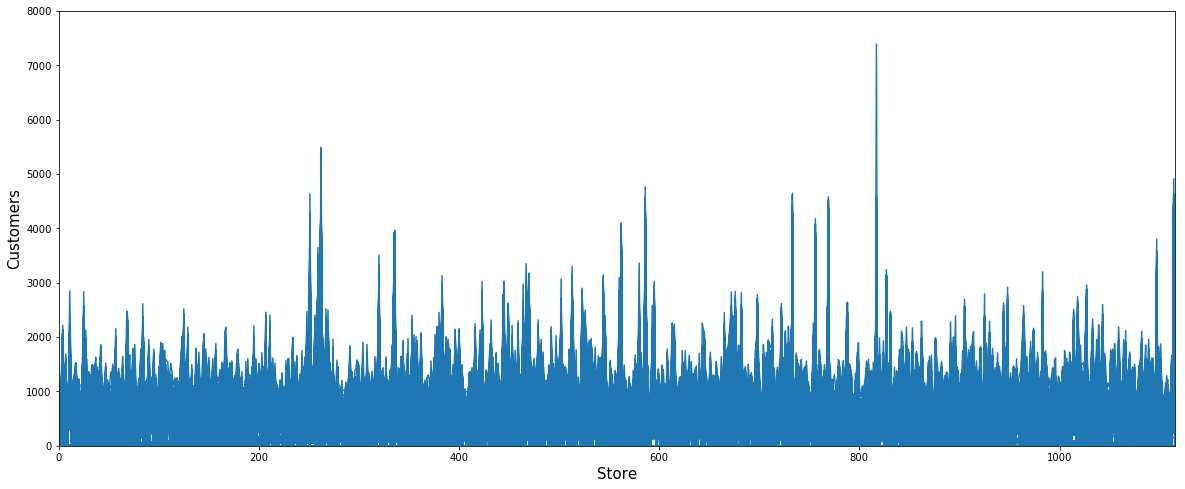

In [7]:
plt.figure(figsize=(20,8))
plt.plot(train_org['Store'],train_org['Customers'])
plt.ylim(0,8000)
plt.xlim(0,1115)
plt.xlabel('Store',fontsize=15)
plt.ylabel('Customers',fontsize=15)

In [100]:
store_sales = train_org['Sales'].groupby(train_org['Store'])

In [114]:
df_new = train_org.Sales[train_org['Store']==1]

In [116]:
df_new.head()

0       5263
1115    5020
2230    4782
3345    5011
4460    6102
Name: Sales, dtype: int64

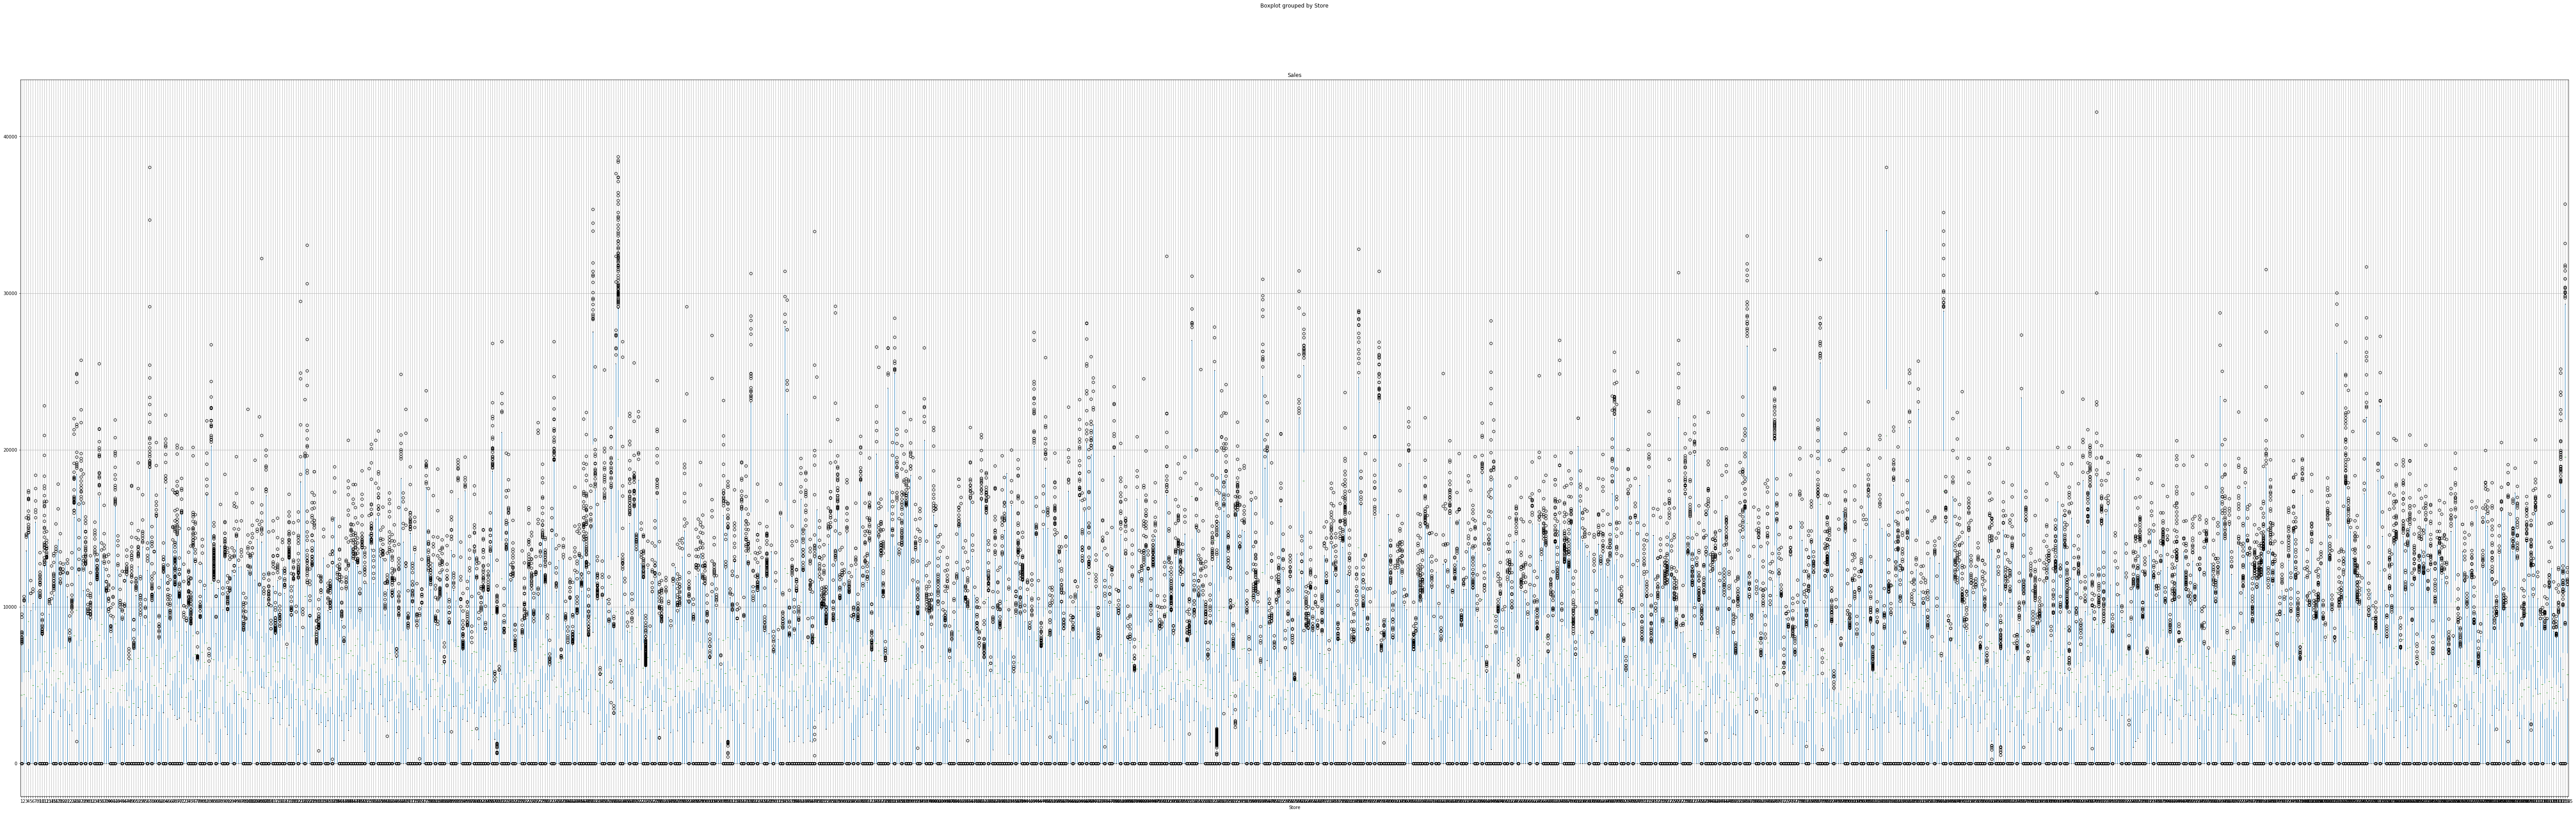

In [133]:
train_org.boxplot(column='Sales',by='Store',figsize=(100,30),showbox=False)

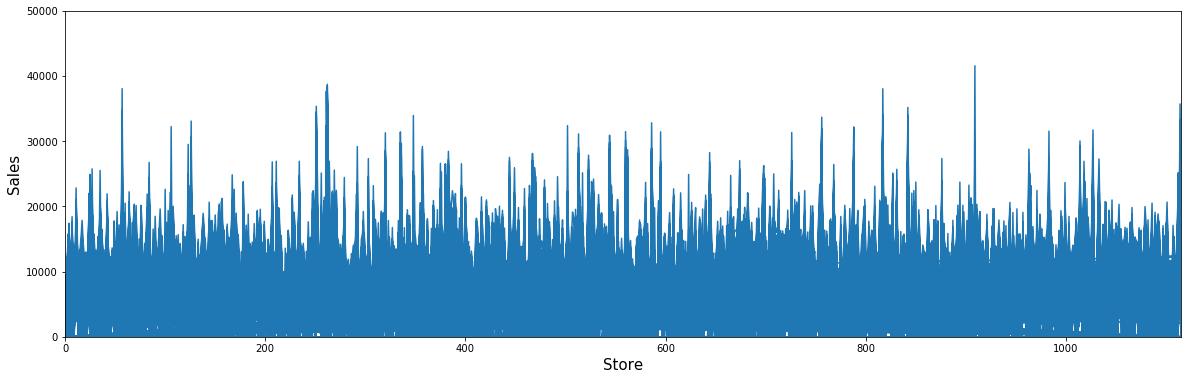

In [16]:
plt.figure(figsize=(20,6))
plt.plot(train_org['Store'],train_org['Sales'])
plt.ylim(0,50000)
plt.xlim(0,1115)
plt.xlabel('Store',fontsize=15)
plt.ylabel('Sales',fontsize=15)

{'boxes': [],
 'caps': [<matplotlib.lines.Line2D at 0x7efd0ac7c0b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efd0ac676a0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efd0ac74278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7efd0ac88518>,
  <matplotlib.lines.Line2D at 0x7efd0ac83e48>]}

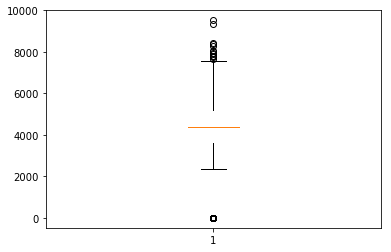

In [132]:
store_1 = train_org.Sales[train_org['Store']==1]
store_2 = train_org.Sales[train_org['Store']==2]
store_3 = train_org.Sales[train_org['Store']==3]
store_4 = train_org.Sales[train_org['Store']==4]
store_5 = train_org.Sales[train_org['Store']==5]
store_6 = train_org.Sales[train_org['Store']==6]
store_7 = train_org.Sales[train_org['Store']==7]
store_8 = train_org.Sales[train_org['Store']==8]
store_9 = train_org.Sales[train_org['Store']==9]
store_10 = train_org.Sales[train_org['Store']==10]
store_11 = train_org.Sales[train_org['Store']==11]
store_12 = train_org.Sales[train_org['Store']==12]




plt.boxplot(train_org.Sales[train_org['Store']==1],showbox=False)

In [110]:
for i in store_org['Store']:
    train_org.loc[train_org['Store']==i]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
merge_data_train = pd.merge(data_train,data_store,on='Store',how='outer')

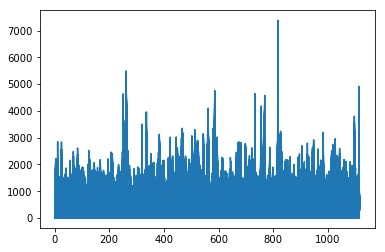

In [17]:
plt.plot(train_org['Store'],train_org['Customers'])

In [22]:
train_org2 = pd.read_csv('data/train.csv',index_col='Date')

/root/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
train_org3=train_org[['Date','Sales']]
train_org3.head()

,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822


In [32]:
train_org3.resample("1m").mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'